<a href="https://www.kaggle.com/code/mustafacihadgoktepe/mnist-cnn?scriptVersionId=108361652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.6.4


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print('Shape of x_train is: {}'.format(x_train.shape))
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of x_test is: {}'.format(x_test.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (60000, 28, 28)
Shape of y_train is: (60000,)
Shape of x_test is: (10000, 28, 28)
Shape of y_test is: (10000,)


In [4]:
np.isnan(x_train).any()

False

In [5]:
np.isnan(x_test).any()

False

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

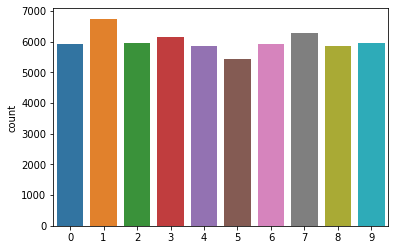

In [6]:
sns.countplot(y_train)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train[0].max()

255

In [9]:
x_train[0].min()

0

In [10]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train = x_train/255
x_test = x_test/255

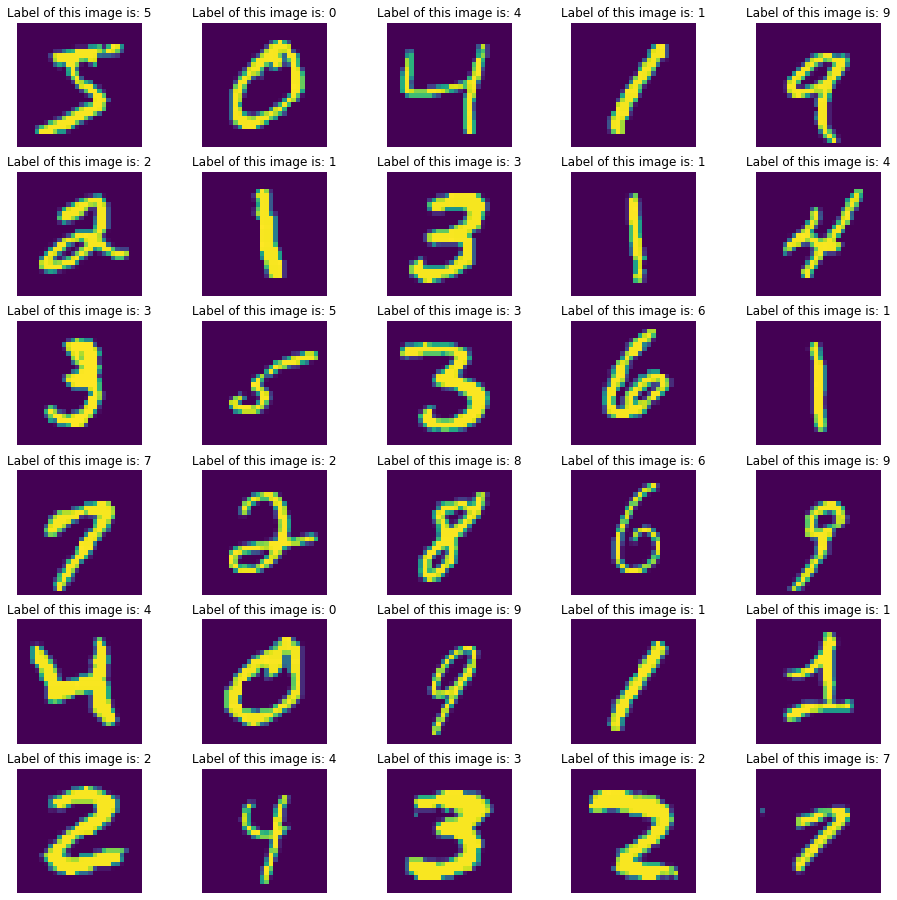

In [11]:
plt.figure(figsize= (16,16))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.axis('off')
    plt.title('Label of this image is: ' + str(y_train[i]))
    plt.imshow(x_train[i])

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 64)         

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.1,
                    callbacks=early_stopping)

Epoch 1/5
844/844 [==============================] - 57s 67ms/step - loss: 0.2903 - sparse_categorical_accuracy: 0.9057 - val_loss: 0.0519 - val_sparse_categorical_accuracy: 0.9847
Epoch 2/5
844/844 [==============================] - 58s 69ms/step - loss: 0.0874 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.0409 - val_sparse_categorical_accuracy: 0.9875
Epoch 3/5
844/844 [==============================] - 57s 68ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.0285 - val_sparse_categorical_accuracy: 0.9923
Epoch 4/5
844/844 [==============================] - 62s 74ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0282 - val_sparse_categorical_accuracy: 0.9915
Epoch 5/5
844/844 [==============================] - 54s 65ms/step - loss: 0.0515 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0261 - val_sparse_categorical_accuracy: 0.9933


In [29]:
history_df = pd.DataFrame(history.history)
history_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.290330,0.905741,0.051888,0.984667
1,0.087419,0.973722,0.040949,0.987500
2,0.066800,0.980037,0.028543,0.992333
3,0.056315,0.983093,0.028221,0.991500
4,0.051451,0.985111,0.026099,0.993333


<AxesSubplot:title={'center':'Accuracy'}>

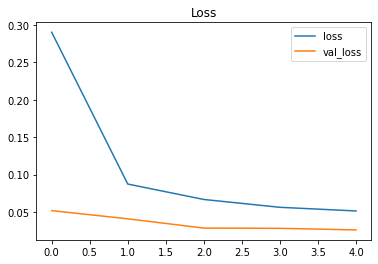

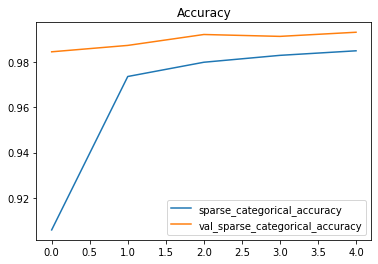

In [30]:
history_df.loc[:,['loss', 'val_loss']].plot(title= 'Loss')
history_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(title= 'Accuracy')

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9932


[0.02040591463446617, 0.9932000041007996]

In [34]:
y_pred = model.predict(x_test)
y_pred

array([[6.9609457e-12, 7.9360007e-08, 6.4424944e-07, ..., 9.9999857e-01,
        1.3898585e-10, 7.9526842e-08],
       [4.6006289e-07, 1.3439522e-05, 9.9998200e-01, ..., 2.6251760e-06,
        1.7612869e-08, 5.5139822e-09],
       [1.2175497e-06, 9.9927670e-01, 7.5607531e-05, ..., 1.4126142e-04,
        4.0093443e-04, 2.3581386e-05],
       ...,
       [4.3477370e-12, 2.5508466e-09, 1.4000351e-09, ..., 9.9149871e-09,
        1.7978566e-08, 1.2166653e-07],
       [2.7391792e-10, 3.9358056e-10, 1.7599644e-12, ..., 2.1356419e-12,
        2.5524474e-07, 1.1835845e-09],
       [4.9468258e-06, 5.9469937e-07, 6.3514779e-07, ..., 8.5570689e-10,
        1.8343842e-05, 8.0364849e-08]], dtype=float32)

In [35]:
y_pred_classes = np.argmax(y_pred,axis = 1)
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_test, y_pred_classes, average='weighted'),
    recall_score(y_test, y_pred_classes, average='weighted'),
    f1_score(y_test, y_pred_classes, average='weighted')))

Precision score is: 0.993210 
Recall score is: 0.993200 
f1 score is: 0.993197


In [38]:
from sklearn.metrics import classification_report

report_mnist = pd.DataFrame(classification_report(y_test, y_pred_classes,
                                                output_dict=True))
report_mnist

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.992893,0.994718,0.995164,0.991133,0.993884,0.993266,0.998944,0.991245,0.988798,0.992008,0.9932,0.993205,0.993210
recall,0.997959,0.995595,0.997093,0.996040,0.992872,0.992152,0.987474,0.991245,0.996920,0.984143,0.9932,0.993149,0.993200
f1-score,0.995420,0.995156,0.996128,0.993580,0.993377,0.992709,0.993176,0.991245,0.992843,0.988060,0.9932,0.993169,0.993197
support,980.000000,1135.000000,1032.000000,1010.000000,982.000000,892.000000,958.000000,1028.000000,974.000000,1009.000000,0.9932,10000.000000,10000.000000


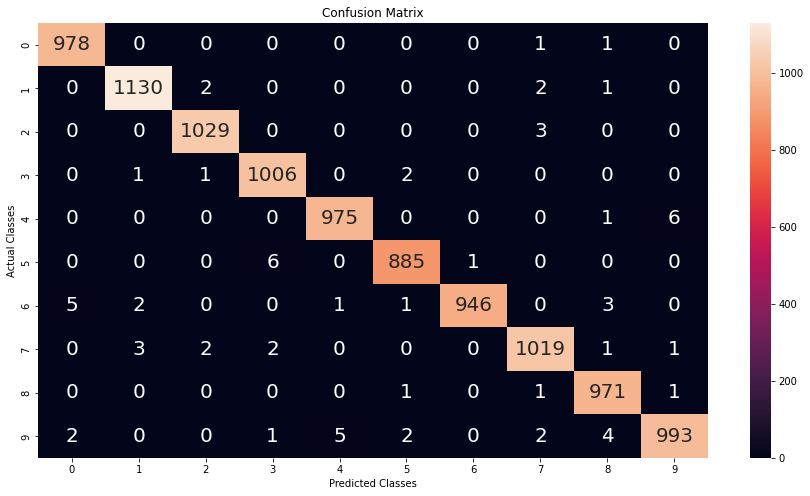

In [49]:
from sklearn.metrics import confusion_matrix

cm_mnist = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize = (15,8));
p = sns.heatmap(cm_mnist, annot=True, annot_kws={'size': 20}, fmt='g');
p.set(title='Confusion Matrix');
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

Thanks for reading.